<a href="https://colab.research.google.com/github/SeathWR/Analisis_dedatos/blob/main/machine_videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn matplotlib

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
from google.colab import files

In [4]:
load = files.upload()

Saving vgsales.xlsx to vgsales.xlsx


In [5]:
Videogames = pd.read_excel('vgsales.xlsx')

In [6]:
Videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## limpieza y exploracion

In [7]:
print(Videogames.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


## limpiar vacios


In [8]:
Videogames.dropna(subset=['Year', 'Publisher'], inplace=True)

In [9]:
print(Videogames.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


## Selección y transformación de características

In [10]:
# Selección de características y variable objetivo
caracteristicas = Videogames[['Year', 'Platform', 'Genre', 'Publisher']]
Objetivo = Videogames['Global_Sales']

# Convertir variables categóricas a dummies (one-hot encoding)
caracteristicas = pd.get_dummies(caracteristicas, columns=['Platform', 'Genre', 'Publisher'])


## Dividir los datos en conjuntos de entrenamiento y prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, Objetivo, test_size=0.2, random_state=42)

## Regresion lineal

In [12]:
# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_linear = linear_model.predict(X_test)


## Random forest Regressor


In [13]:
# Entrenar el modelo de bosque aleatorio
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)


## Evaluar modelo

In [15]:
# Función para imprimir métricas
def evaluar_modelo(y_test, y_pred, modelo_VideoJuegos):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Evaluación del {modelo_VideoJuegos}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}\n")

# Evaluar regresión lineal
evaluar_modelo(y_test, y_pred_linear, "Regresión Lineal")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


Evaluación del Regresión Lineal:
MSE: 4.903199731345765e+18
MAE: 140679653.6796804
R^2: -1.146151634950726e+18

Evaluación del Random Forest:
MSE: 4.112783784515368
MAE: 0.5184567361650626
R^2: 0.03861271881589845



## visualizacion de resultados

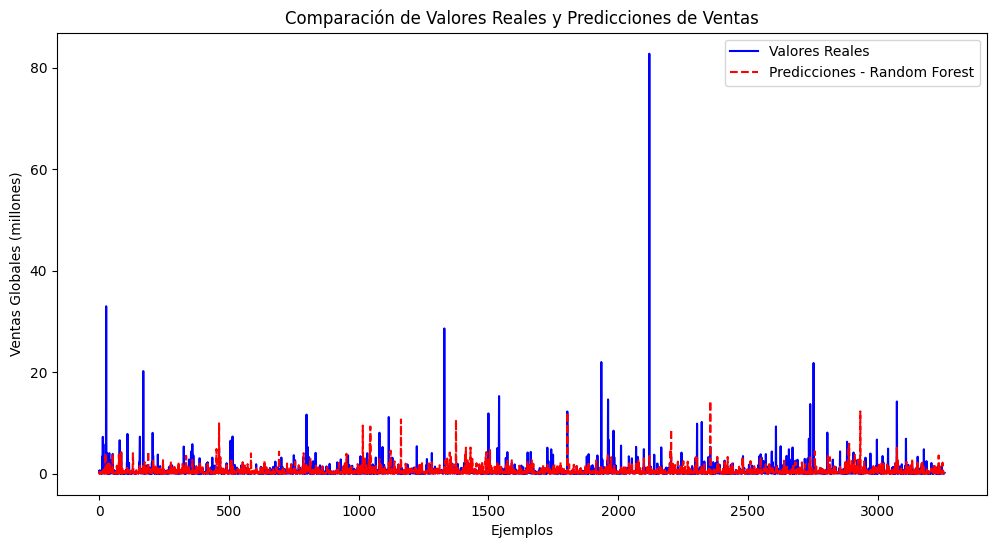

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valores Reales", color="blue")
plt.plot(y_pred_rf, label="Predicciones - Random Forest", color="red", linestyle="dashed")
plt.legend()
plt.title("Comparación de Valores Reales y Predicciones de Ventas")
plt.xlabel("Ejemplos")
plt.ylabel("Ventas Globales (millones)")
plt.show()
